In [38]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame, Panel
%matplotlib inline

In [39]:
ao = np.loadtxt('play.txt')

In [40]:
ao[0:2]

array([[  1.95000000e+03,   1.00000000e+00,  -6.03100000e-02],
       [  1.95000000e+03,   2.00000000e+00,   6.26810000e-01]])

In [41]:
ao.shape

(807, 3)

In [47]:
dates = pd.date_range('1950-01', '2017-04', freq='M')

In [44]:
dates

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2016-04-30', '2016-05-31', '2016-06-30', '2016-07-31',
               '2016-08-31', '2016-09-30', '2016-10-31', '2016-11-30',
               '2016-12-31', '2017-01-31'],
              dtype='datetime64[ns]', length=805, freq='M')

In [48]:
dates.shape

(807,)

In [49]:
AO = Series(ao[:,2], index=dates)

In [51]:
AO.head(5)

1950-01-31   -0.060310
1950-02-28    0.626810
1950-03-31   -0.008127
1950-04-30    0.555100
1950-05-31    0.071577
Freq: M, dtype: float64

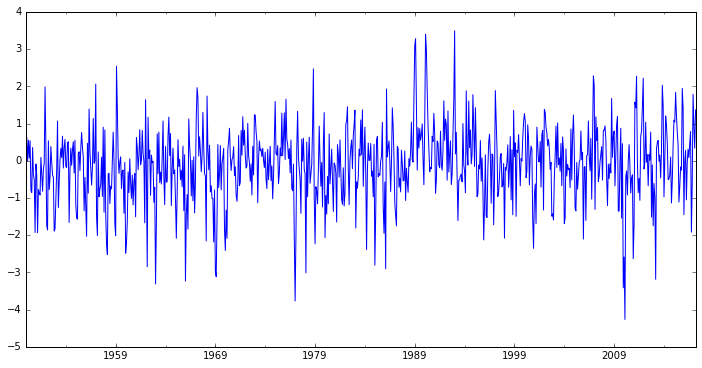

In [54]:
figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
AO.plot()

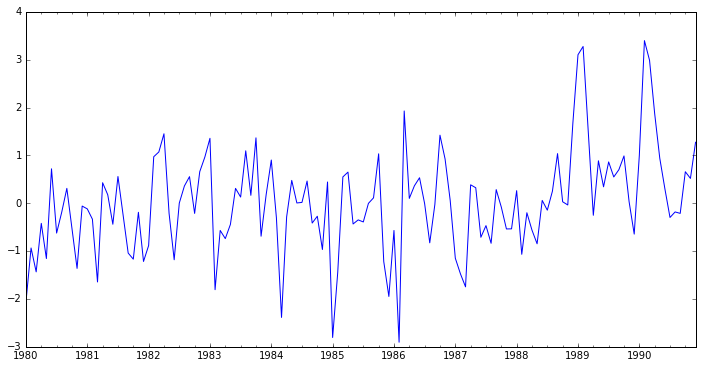

In [56]:
figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
AO['1980':'1990'].plot()

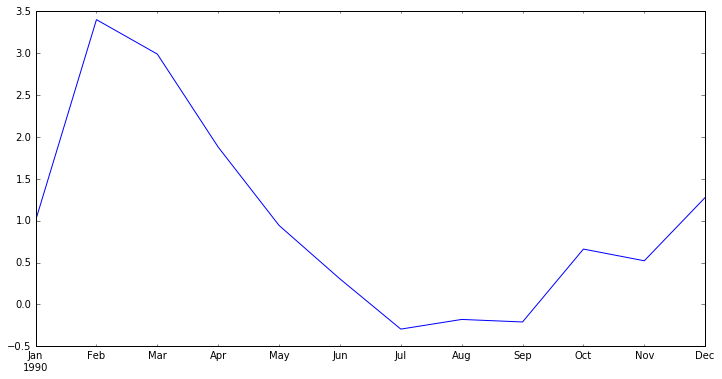

In [57]:
figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
AO['1990-01':'1990-12'].plot()

In [60]:
AO['2011']

2011-01-31   -1.683100
2011-02-28    1.575400
2011-03-31    1.424100
2011-04-30    2.274800
2011-05-31   -0.035093
2011-06-30   -0.857750
2011-07-31   -0.471620
2011-08-31   -1.062600
2011-09-30    0.664740
2011-10-31    0.799750
2011-11-30    1.459200
2011-12-31    2.220800
Freq: M, dtype: float64

In [64]:
nao = ao
dates_nao = pd.date_range('1950-01', '2017-04', freq='M')
NAO = Series(nao[:,2], index=dates_nao)

In [62]:
AO.index

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2016-06-30', '2016-07-31', '2016-08-31', '2016-09-30',
               '2016-10-31', '2016-11-30', '2016-12-31', '2017-01-31',
               '2017-02-28', '2017-03-31'],
              dtype='datetime64[ns]', length=807, freq='M')